## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 53.3ms	remaining: 53.2s
1:	learn: 0.9301086	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9005637	total: 69.7ms	remaining: 23.2s
3:	learn: 0.8720983	total: 72.8ms	remaining: 18.1s
4:	learn: 0.8467410	total: 76.7ms	remaining: 15.3s
5:	learn: 0.8226672	total: 79.6ms	remaining: 13.2s
6:	learn: 0.7994702	total: 83ms	remaining: 11.8s
7:	learn: 0.7784272	total: 86ms	remaining: 10.7s
8:	learn: 0.7602192	total: 88.7ms	remaining: 9.77s
9:	learn: 0.7412421	total: 91.5ms	remaining: 9.05s
10:	learn: 0.7247930	total: 94.4ms	remaining: 8.48s
11:	learn: 0.7089951	total: 97.2ms	remaining: 8s
12:	learn: 0.6951345	total: 99.8ms	remaining: 7.58s
13:	learn: 0.6809276	total: 103ms	remaining: 7.23s
14:	learn: 0.6692630	total: 105ms	remaining: 6.93s
15:	learn: 0.6588323	total: 108ms	remaining: 6.66s
16:	learn: 0.6472700	total: 111ms	remaining: 6.42s
17:	learn: 0.6379982	total: 114ms	remaining: 6.22s
18:	learn: 0.6294674	total: 117ms	remaining: 6.03s
19:	l

38:	learn: 0.5255485	total: 185ms	remaining: 4.56s
39:	learn: 0.5217941	total: 188ms	remaining: 4.51s
40:	learn: 0.5196440	total: 191ms	remaining: 4.47s
41:	learn: 0.5170220	total: 194ms	remaining: 4.43s
42:	learn: 0.5141148	total: 197ms	remaining: 4.39s
43:	learn: 0.5116444	total: 200ms	remaining: 4.34s
44:	learn: 0.5100547	total: 203ms	remaining: 4.31s
45:	learn: 0.5069096	total: 206ms	remaining: 4.27s
46:	learn: 0.5051685	total: 209ms	remaining: 4.23s
47:	learn: 0.5033968	total: 212ms	remaining: 4.2s
48:	learn: 0.5012433	total: 215ms	remaining: 4.17s
49:	learn: 0.4986132	total: 218ms	remaining: 4.13s
50:	learn: 0.4968022	total: 220ms	remaining: 4.1s
51:	learn: 0.4951632	total: 223ms	remaining: 4.07s
52:	learn: 0.4928924	total: 226ms	remaining: 4.04s
53:	learn: 0.4917272	total: 229ms	remaining: 4.01s
54:	learn: 0.4895079	total: 232ms	remaining: 3.98s
55:	learn: 0.4881884	total: 235ms	remaining: 3.95s
56:	learn: 0.4861566	total: 238ms	remaining: 3.93s
57:	learn: 0.4850201	total: 240ms

103:	learn: 0.4466014	total: 376ms	remaining: 3.24s
104:	learn: 0.4461730	total: 379ms	remaining: 3.23s
105:	learn: 0.4457259	total: 382ms	remaining: 3.22s
106:	learn: 0.4451085	total: 385ms	remaining: 3.21s
107:	learn: 0.4447909	total: 388ms	remaining: 3.2s
108:	learn: 0.4440936	total: 391ms	remaining: 3.19s
109:	learn: 0.4435519	total: 394ms	remaining: 3.19s
110:	learn: 0.4431075	total: 396ms	remaining: 3.17s
111:	learn: 0.4425498	total: 399ms	remaining: 3.17s
112:	learn: 0.4419106	total: 402ms	remaining: 3.16s
113:	learn: 0.4414425	total: 405ms	remaining: 3.15s
114:	learn: 0.4407446	total: 408ms	remaining: 3.14s
115:	learn: 0.4402011	total: 411ms	remaining: 3.13s
116:	learn: 0.4398559	total: 414ms	remaining: 3.13s
117:	learn: 0.4392990	total: 417ms	remaining: 3.12s
118:	learn: 0.4389153	total: 421ms	remaining: 3.12s
119:	learn: 0.4383331	total: 424ms	remaining: 3.11s
120:	learn: 0.4378136	total: 428ms	remaining: 3.11s
121:	learn: 0.4375553	total: 431ms	remaining: 3.1s
122:	learn: 0.

168:	learn: 0.4170486	total: 571ms	remaining: 2.81s
169:	learn: 0.4165960	total: 574ms	remaining: 2.8s
170:	learn: 0.4161870	total: 577ms	remaining: 2.8s
171:	learn: 0.4156228	total: 580ms	remaining: 2.79s
172:	learn: 0.4153041	total: 583ms	remaining: 2.79s
173:	learn: 0.4148857	total: 585ms	remaining: 2.78s
174:	learn: 0.4144190	total: 588ms	remaining: 2.77s
175:	learn: 0.4140875	total: 591ms	remaining: 2.77s
176:	learn: 0.4136755	total: 594ms	remaining: 2.76s
177:	learn: 0.4133860	total: 597ms	remaining: 2.75s
178:	learn: 0.4129780	total: 599ms	remaining: 2.75s
179:	learn: 0.4122907	total: 602ms	remaining: 2.74s
180:	learn: 0.4119188	total: 605ms	remaining: 2.74s
181:	learn: 0.4115412	total: 608ms	remaining: 2.73s
182:	learn: 0.4112620	total: 611ms	remaining: 2.73s
183:	learn: 0.4107734	total: 614ms	remaining: 2.72s
184:	learn: 0.4104881	total: 617ms	remaining: 2.72s
185:	learn: 0.4100009	total: 621ms	remaining: 2.72s
186:	learn: 0.4096453	total: 623ms	remaining: 2.71s
187:	learn: 0.

234:	learn: 0.3945894	total: 766ms	remaining: 2.49s
235:	learn: 0.3944181	total: 768ms	remaining: 2.49s
236:	learn: 0.3941497	total: 772ms	remaining: 2.48s
237:	learn: 0.3939819	total: 775ms	remaining: 2.48s
238:	learn: 0.3938322	total: 778ms	remaining: 2.48s
239:	learn: 0.3935463	total: 781ms	remaining: 2.47s
240:	learn: 0.3933166	total: 784ms	remaining: 2.47s
241:	learn: 0.3930992	total: 786ms	remaining: 2.46s
242:	learn: 0.3928898	total: 790ms	remaining: 2.46s
243:	learn: 0.3926199	total: 793ms	remaining: 2.46s
244:	learn: 0.3923955	total: 796ms	remaining: 2.45s
245:	learn: 0.3922312	total: 799ms	remaining: 2.45s
246:	learn: 0.3919499	total: 802ms	remaining: 2.44s
247:	learn: 0.3917420	total: 805ms	remaining: 2.44s
248:	learn: 0.3915186	total: 808ms	remaining: 2.44s
249:	learn: 0.3912759	total: 812ms	remaining: 2.43s
250:	learn: 0.3908375	total: 815ms	remaining: 2.43s
251:	learn: 0.3904815	total: 818ms	remaining: 2.43s
252:	learn: 0.3902127	total: 821ms	remaining: 2.42s
253:	learn: 

296:	learn: 0.3801959	total: 955ms	remaining: 2.26s
297:	learn: 0.3799439	total: 958ms	remaining: 2.25s
298:	learn: 0.3797228	total: 960ms	remaining: 2.25s
299:	learn: 0.3795554	total: 963ms	remaining: 2.25s
300:	learn: 0.3793733	total: 971ms	remaining: 2.25s
301:	learn: 0.3791607	total: 974ms	remaining: 2.25s
302:	learn: 0.3789297	total: 977ms	remaining: 2.25s
303:	learn: 0.3787482	total: 980ms	remaining: 2.24s
304:	learn: 0.3786528	total: 983ms	remaining: 2.24s
305:	learn: 0.3784406	total: 986ms	remaining: 2.24s
306:	learn: 0.3782934	total: 989ms	remaining: 2.23s
307:	learn: 0.3781631	total: 992ms	remaining: 2.23s
308:	learn: 0.3779278	total: 995ms	remaining: 2.22s
309:	learn: 0.3777358	total: 997ms	remaining: 2.22s
310:	learn: 0.3775809	total: 1s	remaining: 2.21s
311:	learn: 0.3774323	total: 1s	remaining: 2.21s
312:	learn: 0.3772732	total: 1.01s	remaining: 2.21s
313:	learn: 0.3771184	total: 1.01s	remaining: 2.2s
314:	learn: 0.3769370	total: 1.01s	remaining: 2.2s
315:	learn: 0.376664

356:	learn: 0.3691107	total: 1.15s	remaining: 2.06s
357:	learn: 0.3689645	total: 1.15s	remaining: 2.06s
358:	learn: 0.3687886	total: 1.16s	remaining: 2.06s
359:	learn: 0.3686485	total: 1.16s	remaining: 2.06s
360:	learn: 0.3685749	total: 1.16s	remaining: 2.06s
361:	learn: 0.3683909	total: 1.17s	remaining: 2.06s
362:	learn: 0.3682710	total: 1.17s	remaining: 2.05s
363:	learn: 0.3681254	total: 1.17s	remaining: 2.05s
364:	learn: 0.3679761	total: 1.18s	remaining: 2.05s
365:	learn: 0.3677932	total: 1.18s	remaining: 2.04s
366:	learn: 0.3676022	total: 1.18s	remaining: 2.04s
367:	learn: 0.3674148	total: 1.19s	remaining: 2.04s
368:	learn: 0.3673439	total: 1.19s	remaining: 2.03s
369:	learn: 0.3671985	total: 1.19s	remaining: 2.03s
370:	learn: 0.3670563	total: 1.19s	remaining: 2.02s
371:	learn: 0.3669128	total: 1.2s	remaining: 2.02s
372:	learn: 0.3668381	total: 1.2s	remaining: 2.02s
373:	learn: 0.3666564	total: 1.2s	remaining: 2.01s
374:	learn: 0.3663789	total: 1.21s	remaining: 2.01s
375:	learn: 0.3

419:	learn: 0.3589470	total: 1.34s	remaining: 1.85s
420:	learn: 0.3587972	total: 1.34s	remaining: 1.84s
421:	learn: 0.3586831	total: 1.34s	remaining: 1.84s
422:	learn: 0.3585620	total: 1.34s	remaining: 1.83s
423:	learn: 0.3584427	total: 1.35s	remaining: 1.83s
424:	learn: 0.3583044	total: 1.35s	remaining: 1.83s
425:	learn: 0.3581698	total: 1.35s	remaining: 1.82s
426:	learn: 0.3580461	total: 1.36s	remaining: 1.82s
427:	learn: 0.3579182	total: 1.36s	remaining: 1.82s
428:	learn: 0.3577521	total: 1.36s	remaining: 1.81s
429:	learn: 0.3576138	total: 1.37s	remaining: 1.81s
430:	learn: 0.3575528	total: 1.37s	remaining: 1.81s
431:	learn: 0.3574686	total: 1.37s	remaining: 1.8s
432:	learn: 0.3572923	total: 1.37s	remaining: 1.8s
433:	learn: 0.3571859	total: 1.38s	remaining: 1.8s
434:	learn: 0.3570185	total: 1.38s	remaining: 1.79s
435:	learn: 0.3568416	total: 1.38s	remaining: 1.79s
436:	learn: 0.3566846	total: 1.39s	remaining: 1.79s
437:	learn: 0.3565875	total: 1.39s	remaining: 1.78s
438:	learn: 0.3

485:	learn: 0.3497143	total: 1.53s	remaining: 1.62s
486:	learn: 0.3496172	total: 1.53s	remaining: 1.61s
487:	learn: 0.3494609	total: 1.54s	remaining: 1.61s
488:	learn: 0.3493200	total: 1.54s	remaining: 1.61s
489:	learn: 0.3491550	total: 1.54s	remaining: 1.6s
490:	learn: 0.3490323	total: 1.54s	remaining: 1.6s
491:	learn: 0.3488767	total: 1.55s	remaining: 1.6s
492:	learn: 0.3487285	total: 1.55s	remaining: 1.59s
493:	learn: 0.3486318	total: 1.55s	remaining: 1.59s
494:	learn: 0.3485016	total: 1.56s	remaining: 1.59s
495:	learn: 0.3484072	total: 1.56s	remaining: 1.58s
496:	learn: 0.3482698	total: 1.56s	remaining: 1.58s
497:	learn: 0.3481630	total: 1.56s	remaining: 1.58s
498:	learn: 0.3480855	total: 1.57s	remaining: 1.57s
499:	learn: 0.3478655	total: 1.57s	remaining: 1.57s
500:	learn: 0.3477966	total: 1.57s	remaining: 1.57s
501:	learn: 0.3476142	total: 1.58s	remaining: 1.56s
502:	learn: 0.3474667	total: 1.58s	remaining: 1.56s
503:	learn: 0.3473844	total: 1.58s	remaining: 1.56s
504:	learn: 0.3

548:	learn: 0.3416228	total: 1.72s	remaining: 1.41s
549:	learn: 0.3414331	total: 1.72s	remaining: 1.41s
550:	learn: 0.3413090	total: 1.73s	remaining: 1.41s
551:	learn: 0.3411591	total: 1.73s	remaining: 1.4s
552:	learn: 0.3410901	total: 1.73s	remaining: 1.4s
553:	learn: 0.3409923	total: 1.74s	remaining: 1.4s
554:	learn: 0.3408730	total: 1.74s	remaining: 1.39s
555:	learn: 0.3408310	total: 1.74s	remaining: 1.39s
556:	learn: 0.3407365	total: 1.75s	remaining: 1.39s
557:	learn: 0.3406506	total: 1.75s	remaining: 1.39s
558:	learn: 0.3405352	total: 1.75s	remaining: 1.38s
559:	learn: 0.3404352	total: 1.75s	remaining: 1.38s
560:	learn: 0.3403419	total: 1.76s	remaining: 1.38s
561:	learn: 0.3402836	total: 1.76s	remaining: 1.37s
562:	learn: 0.3402264	total: 1.76s	remaining: 1.37s
563:	learn: 0.3400466	total: 1.77s	remaining: 1.37s
564:	learn: 0.3399235	total: 1.77s	remaining: 1.36s
565:	learn: 0.3398064	total: 1.77s	remaining: 1.36s
566:	learn: 0.3396466	total: 1.78s	remaining: 1.36s
567:	learn: 0.3

611:	learn: 0.3351716	total: 1.91s	remaining: 1.21s
612:	learn: 0.3351155	total: 1.92s	remaining: 1.21s
613:	learn: 0.3350041	total: 1.92s	remaining: 1.21s
614:	learn: 0.3349098	total: 1.92s	remaining: 1.2s
615:	learn: 0.3348304	total: 1.92s	remaining: 1.2s
616:	learn: 0.3347009	total: 1.93s	remaining: 1.2s
617:	learn: 0.3346458	total: 1.93s	remaining: 1.19s
618:	learn: 0.3345381	total: 1.93s	remaining: 1.19s
619:	learn: 0.3344101	total: 1.94s	remaining: 1.19s
620:	learn: 0.3343267	total: 1.94s	remaining: 1.18s
621:	learn: 0.3342275	total: 1.94s	remaining: 1.18s
622:	learn: 0.3341456	total: 1.95s	remaining: 1.18s
623:	learn: 0.3340640	total: 1.95s	remaining: 1.17s
624:	learn: 0.3339122	total: 1.95s	remaining: 1.17s
625:	learn: 0.3337503	total: 1.95s	remaining: 1.17s
626:	learn: 0.3336593	total: 1.96s	remaining: 1.16s
627:	learn: 0.3335713	total: 1.96s	remaining: 1.16s
628:	learn: 0.3333915	total: 1.96s	remaining: 1.16s
629:	learn: 0.3333158	total: 1.96s	remaining: 1.15s
630:	learn: 0.3

675:	learn: 0.3286108	total: 2.1s	remaining: 1.01s
676:	learn: 0.3285218	total: 2.11s	remaining: 1s
677:	learn: 0.3284620	total: 2.11s	remaining: 1s
678:	learn: 0.3283999	total: 2.11s	remaining: 999ms
679:	learn: 0.3283506	total: 2.12s	remaining: 996ms
680:	learn: 0.3282208	total: 2.12s	remaining: 993ms
681:	learn: 0.3281020	total: 2.12s	remaining: 989ms
682:	learn: 0.3280328	total: 2.12s	remaining: 986ms
683:	learn: 0.3279574	total: 2.13s	remaining: 983ms
684:	learn: 0.3278928	total: 2.13s	remaining: 980ms
685:	learn: 0.3278094	total: 2.13s	remaining: 977ms
686:	learn: 0.3277178	total: 2.14s	remaining: 974ms
687:	learn: 0.3276684	total: 2.14s	remaining: 970ms
688:	learn: 0.3275537	total: 2.14s	remaining: 967ms
689:	learn: 0.3274808	total: 2.15s	remaining: 964ms
690:	learn: 0.3273839	total: 2.15s	remaining: 961ms
691:	learn: 0.3272773	total: 2.15s	remaining: 958ms
692:	learn: 0.3272088	total: 2.15s	remaining: 955ms
693:	learn: 0.3271216	total: 2.16s	remaining: 952ms
694:	learn: 0.32705

732:	learn: 0.3235938	total: 2.3s	remaining: 837ms
733:	learn: 0.3235120	total: 2.31s	remaining: 839ms
734:	learn: 0.3234421	total: 2.32s	remaining: 836ms
735:	learn: 0.3233367	total: 2.32s	remaining: 833ms
736:	learn: 0.3232438	total: 2.32s	remaining: 829ms
737:	learn: 0.3231289	total: 2.33s	remaining: 826ms
738:	learn: 0.3230697	total: 2.33s	remaining: 823ms
739:	learn: 0.3229734	total: 2.33s	remaining: 819ms
740:	learn: 0.3228697	total: 2.33s	remaining: 816ms
741:	learn: 0.3227984	total: 2.34s	remaining: 813ms
742:	learn: 0.3226895	total: 2.34s	remaining: 810ms
743:	learn: 0.3225924	total: 2.34s	remaining: 807ms
744:	learn: 0.3225096	total: 2.35s	remaining: 804ms
745:	learn: 0.3224088	total: 2.35s	remaining: 800ms
746:	learn: 0.3223202	total: 2.35s	remaining: 797ms
747:	learn: 0.3222404	total: 2.36s	remaining: 794ms
748:	learn: 0.3221810	total: 2.36s	remaining: 791ms
749:	learn: 0.3221342	total: 2.36s	remaining: 787ms
750:	learn: 0.3220746	total: 2.36s	remaining: 784ms
751:	learn: 0

791:	learn: 0.3184514	total: 2.49s	remaining: 654ms
792:	learn: 0.3183529	total: 2.49s	remaining: 651ms
793:	learn: 0.3182569	total: 2.5s	remaining: 648ms
794:	learn: 0.3181932	total: 2.5s	remaining: 645ms
795:	learn: 0.3180848	total: 2.5s	remaining: 641ms
796:	learn: 0.3180327	total: 2.5s	remaining: 638ms
797:	learn: 0.3179305	total: 2.51s	remaining: 635ms
798:	learn: 0.3178456	total: 2.51s	remaining: 632ms
799:	learn: 0.3177655	total: 2.52s	remaining: 629ms
800:	learn: 0.3176826	total: 2.52s	remaining: 626ms
801:	learn: 0.3176217	total: 2.52s	remaining: 622ms
802:	learn: 0.3174842	total: 2.52s	remaining: 619ms
803:	learn: 0.3173800	total: 2.53s	remaining: 616ms
804:	learn: 0.3172892	total: 2.53s	remaining: 613ms
805:	learn: 0.3172199	total: 2.53s	remaining: 610ms
806:	learn: 0.3171379	total: 2.54s	remaining: 607ms
807:	learn: 0.3170699	total: 2.54s	remaining: 604ms
808:	learn: 0.3170027	total: 2.54s	remaining: 600ms
809:	learn: 0.3169244	total: 2.55s	remaining: 597ms
810:	learn: 0.31

853:	learn: 0.3135239	total: 2.68s	remaining: 459ms
854:	learn: 0.3134711	total: 2.69s	remaining: 456ms
855:	learn: 0.3134242	total: 2.69s	remaining: 453ms
856:	learn: 0.3133249	total: 2.69s	remaining: 449ms
857:	learn: 0.3132311	total: 2.69s	remaining: 446ms
858:	learn: 0.3131446	total: 2.7s	remaining: 443ms
859:	learn: 0.3130587	total: 2.7s	remaining: 440ms
860:	learn: 0.3129229	total: 2.7s	remaining: 436ms
861:	learn: 0.3128651	total: 2.71s	remaining: 433ms
862:	learn: 0.3127812	total: 2.71s	remaining: 430ms
863:	learn: 0.3126884	total: 2.72s	remaining: 428ms
864:	learn: 0.3126358	total: 2.73s	remaining: 426ms
865:	learn: 0.3125933	total: 2.73s	remaining: 423ms
866:	learn: 0.3125160	total: 2.74s	remaining: 420ms
867:	learn: 0.3124401	total: 2.74s	remaining: 417ms
868:	learn: 0.3123064	total: 2.74s	remaining: 414ms
869:	learn: 0.3122328	total: 2.75s	remaining: 410ms
870:	learn: 0.3121623	total: 2.75s	remaining: 407ms
871:	learn: 0.3121072	total: 2.75s	remaining: 404ms
872:	learn: 0.3

909:	learn: 0.3093784	total: 2.88s	remaining: 284ms
910:	learn: 0.3093058	total: 2.88s	remaining: 281ms
911:	learn: 0.3092574	total: 2.88s	remaining: 278ms
912:	learn: 0.3092023	total: 2.88s	remaining: 275ms
913:	learn: 0.3091306	total: 2.89s	remaining: 272ms
914:	learn: 0.3090719	total: 2.89s	remaining: 268ms
915:	learn: 0.3090199	total: 2.89s	remaining: 265ms
916:	learn: 0.3089417	total: 2.9s	remaining: 262ms
917:	learn: 0.3088562	total: 2.9s	remaining: 259ms
918:	learn: 0.3087578	total: 2.9s	remaining: 256ms
919:	learn: 0.3086793	total: 2.9s	remaining: 253ms
920:	learn: 0.3086255	total: 2.91s	remaining: 249ms
921:	learn: 0.3085073	total: 2.91s	remaining: 246ms
922:	learn: 0.3084388	total: 2.91s	remaining: 243ms
923:	learn: 0.3083752	total: 2.92s	remaining: 240ms
924:	learn: 0.3082889	total: 2.92s	remaining: 237ms
925:	learn: 0.3081901	total: 2.92s	remaining: 233ms
926:	learn: 0.3081106	total: 2.92s	remaining: 230ms
927:	learn: 0.3080422	total: 2.93s	remaining: 227ms
928:	learn: 0.30

974:	learn: 0.3045983	total: 3.07s	remaining: 78.7ms
975:	learn: 0.3044944	total: 3.07s	remaining: 75.5ms
976:	learn: 0.3044431	total: 3.07s	remaining: 72.4ms
977:	learn: 0.3043959	total: 3.08s	remaining: 69.2ms
978:	learn: 0.3043249	total: 3.08s	remaining: 66.1ms
979:	learn: 0.3042644	total: 3.08s	remaining: 62.9ms
980:	learn: 0.3042142	total: 3.08s	remaining: 59.8ms
981:	learn: 0.3041509	total: 3.09s	remaining: 56.6ms
982:	learn: 0.3041077	total: 3.09s	remaining: 53.5ms
983:	learn: 0.3040665	total: 3.1s	remaining: 50.3ms
984:	learn: 0.3040237	total: 3.1s	remaining: 47.2ms
985:	learn: 0.3039532	total: 3.1s	remaining: 44ms
986:	learn: 0.3038723	total: 3.1s	remaining: 40.9ms
987:	learn: 0.3038141	total: 3.11s	remaining: 37.7ms
988:	learn: 0.3037455	total: 3.11s	remaining: 34.6ms
989:	learn: 0.3036820	total: 3.11s	remaining: 31.4ms
990:	learn: 0.3036165	total: 3.12s	remaining: 28.3ms
991:	learn: 0.3035759	total: 3.12s	remaining: 25.1ms
992:	learn: 0.3035124	total: 3.12s	remaining: 22ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3816889271166193


#### Sanity Checks 

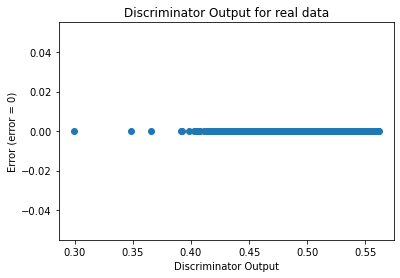

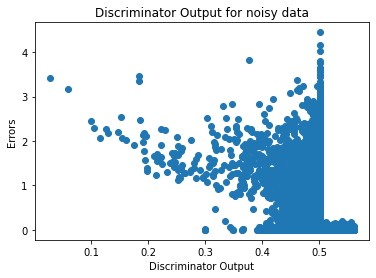

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)